<h2>Import Preprocessed Data</h2>

In [3]:
from data_cleaning import *
df = dataCleaning('./CSV/iphone_dataset.csv')

In [4]:
df.head()

,review_rating,review_helpful_vote,review,lemmatized
0,3,5087,note,[note]
1,1,2822,very bad experience with this iphone xr phone ...,"[bad, experience, iphone, xr, phone, back, cam..."
2,5,1798,amazing phone with amazing camera coming from ...,"[amazing, phone, amazing, camera, coming, ipho..."
3,1,1366,so i got the iphone xr just today the product...,"[got, iphone, xr, today, product, look, amazin..."
4,5,536,i have been an android user all my life until ...,"[android, user, life, decided, try, iphone, xr..."


<h2>Exploratory Data Analysis</h2>

In [2]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import seaborn as sns

In [5]:
mydf = df
words = mydf['lemmatized']
allwords = []

for wordlist in words:
    allwords += wordlist

<h3>Word Cloud</h3>

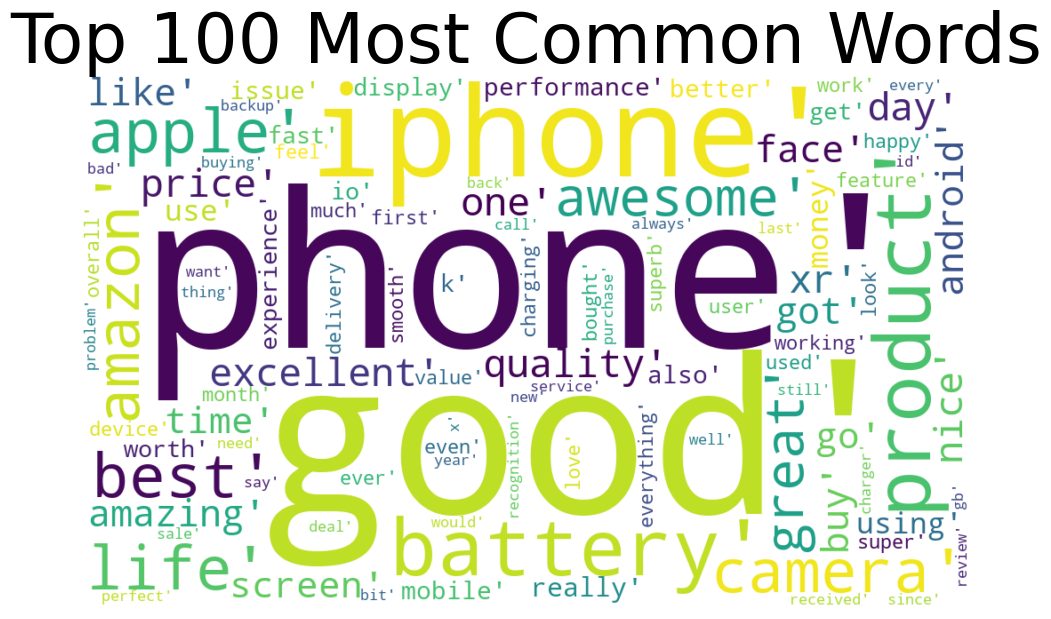

In [8]:
mostcommon100 = FreqDist(allwords).most_common(100)

wordcloud = WordCloud(width=1000,height=600,background_color='white').generate(str(mostcommon100))
fig = plt.figure(figsize=(20,6), facecolor='white')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
# plt.savefig('Wordcloud.png')

<h3>Frequency of Common Words</h3>

Text(0.5, 1.0, 'Frequency of 25 Most Common Words')

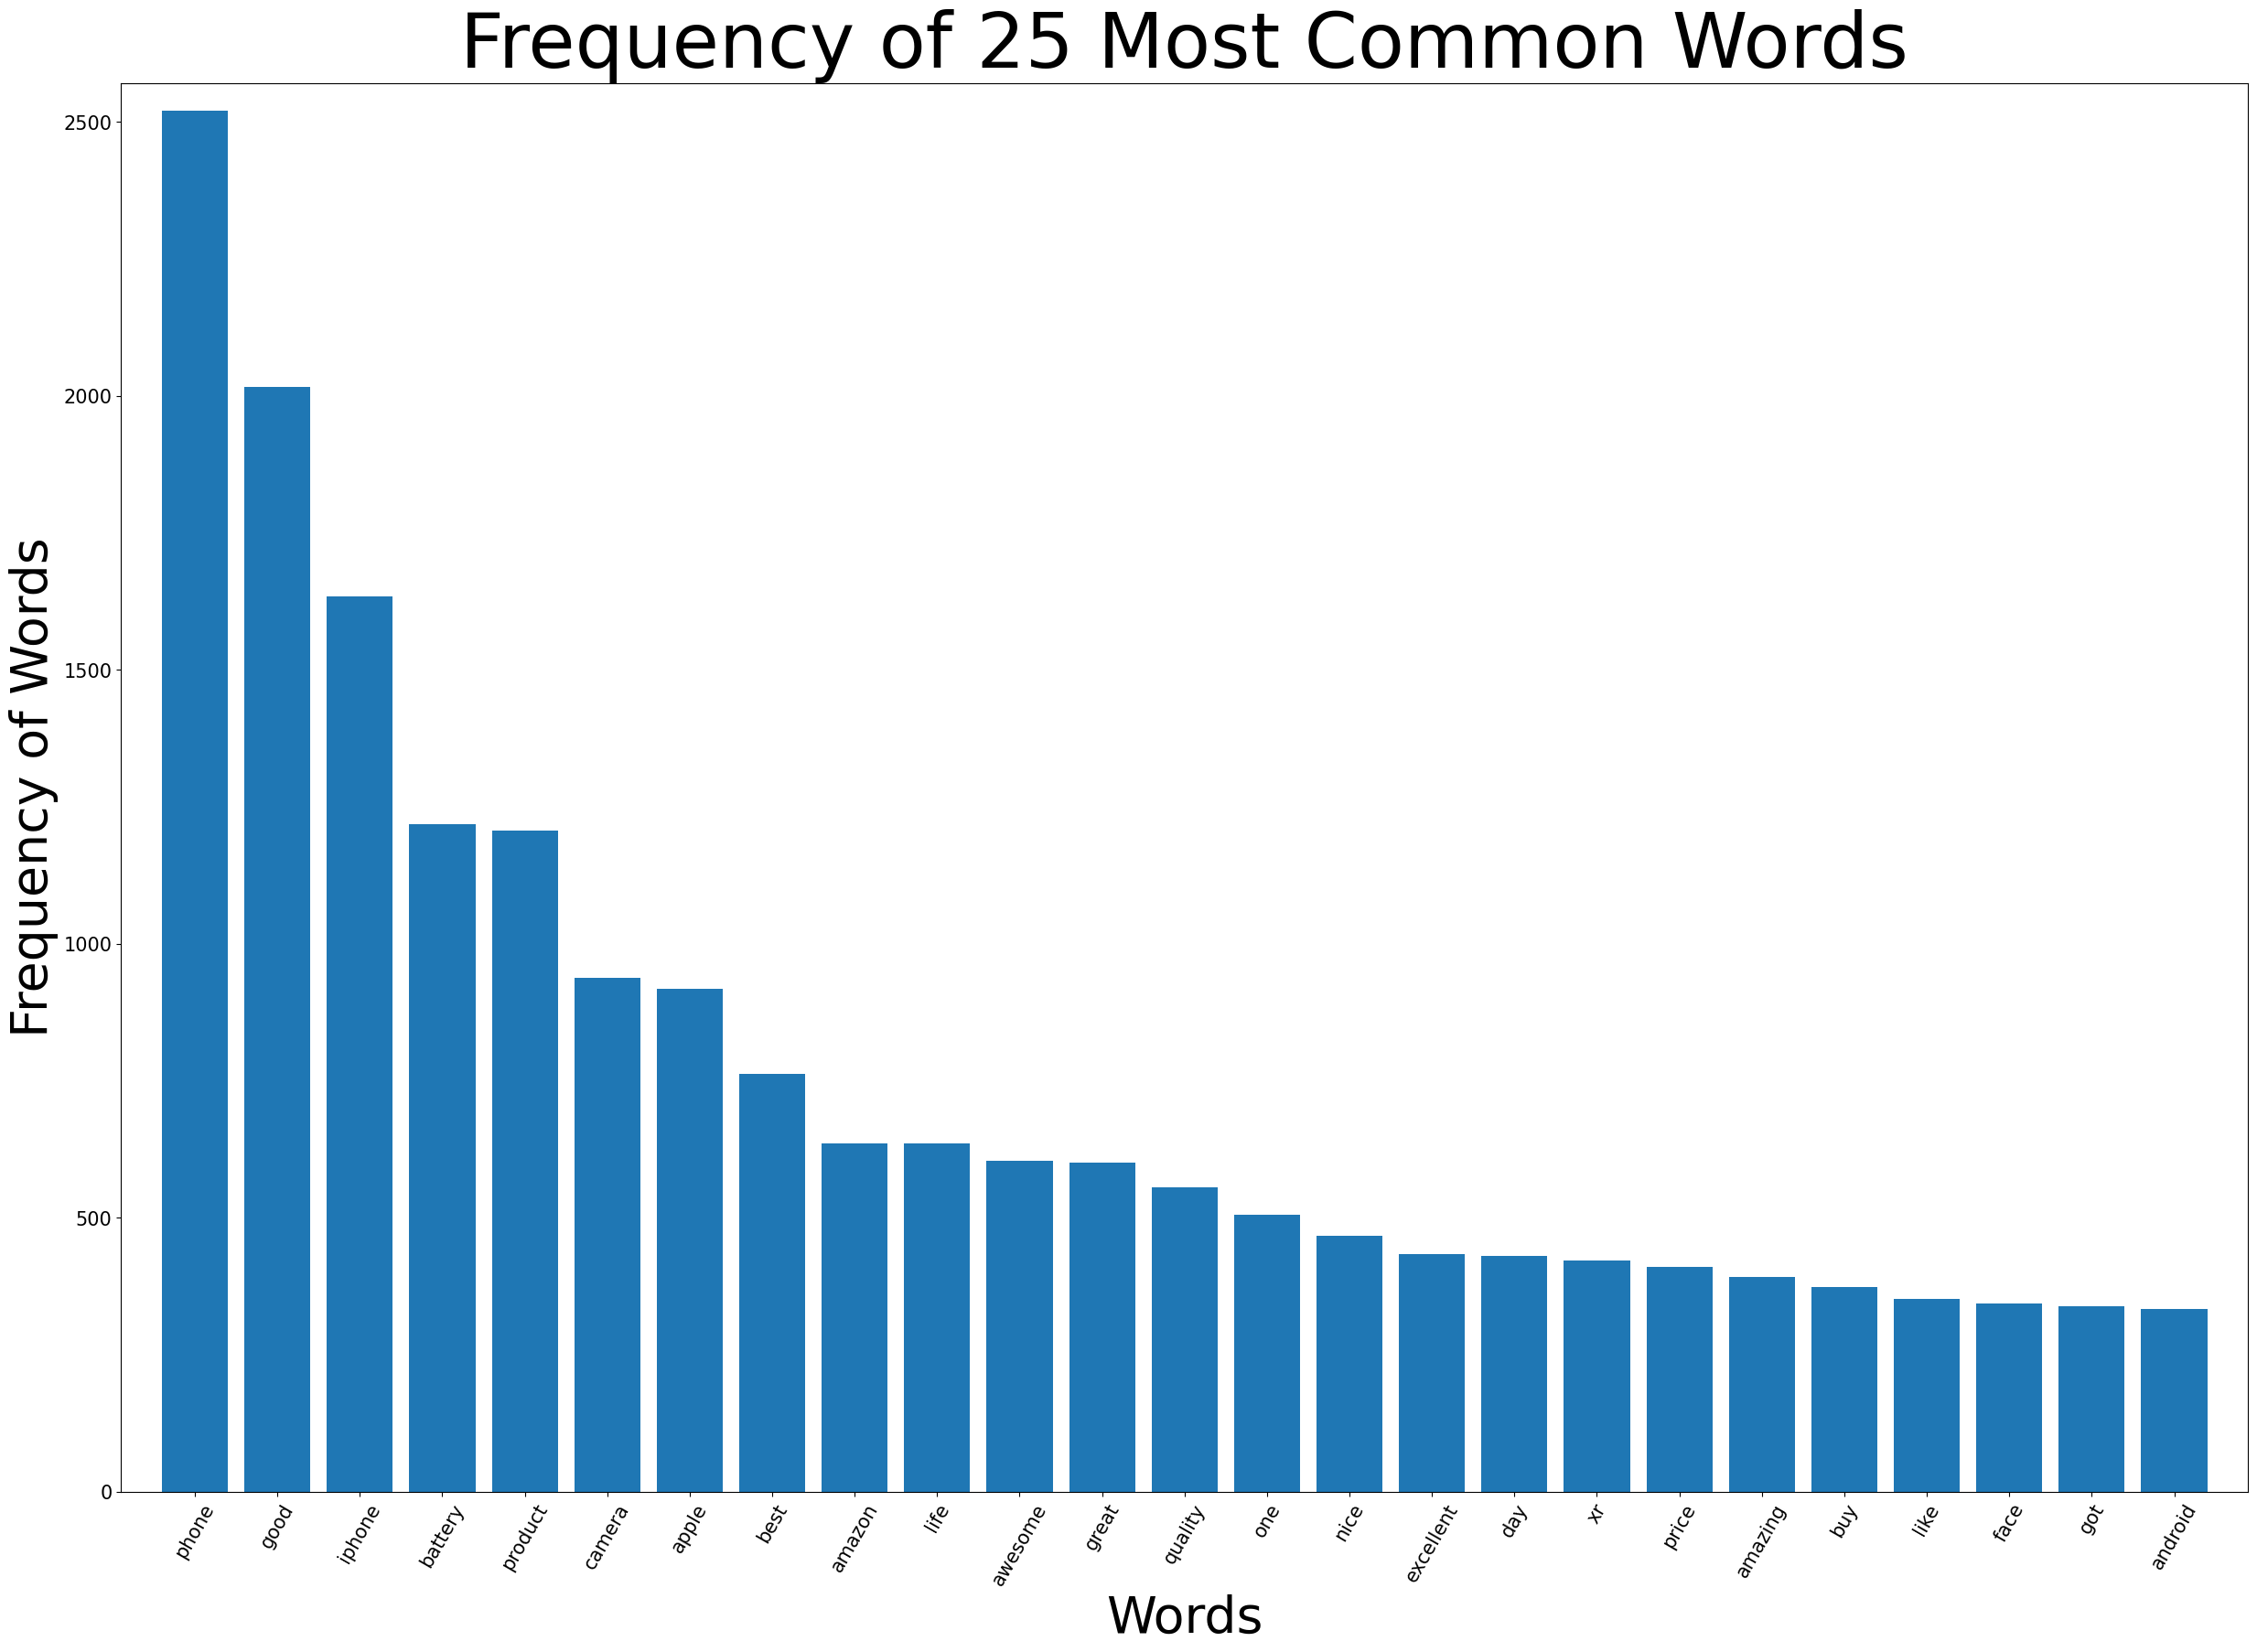

In [10]:
mostcommon25 = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon25)

plt.figure(figsize=(30,20))
plt.margins(0.02)
plt.bar(x,y)
plt.xlabel('Words',fontsize=40)
plt.ylabel('Frequency of Words', fontsize=40)
plt.yticks(fontsize=15)
plt.xticks(rotation=60, fontsize=15)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
# plt.savefig('Frequency Count.png')

<h3>Word Helpfulness</h3>

Text(0.5, 1.0, 'Word Helpfulness')

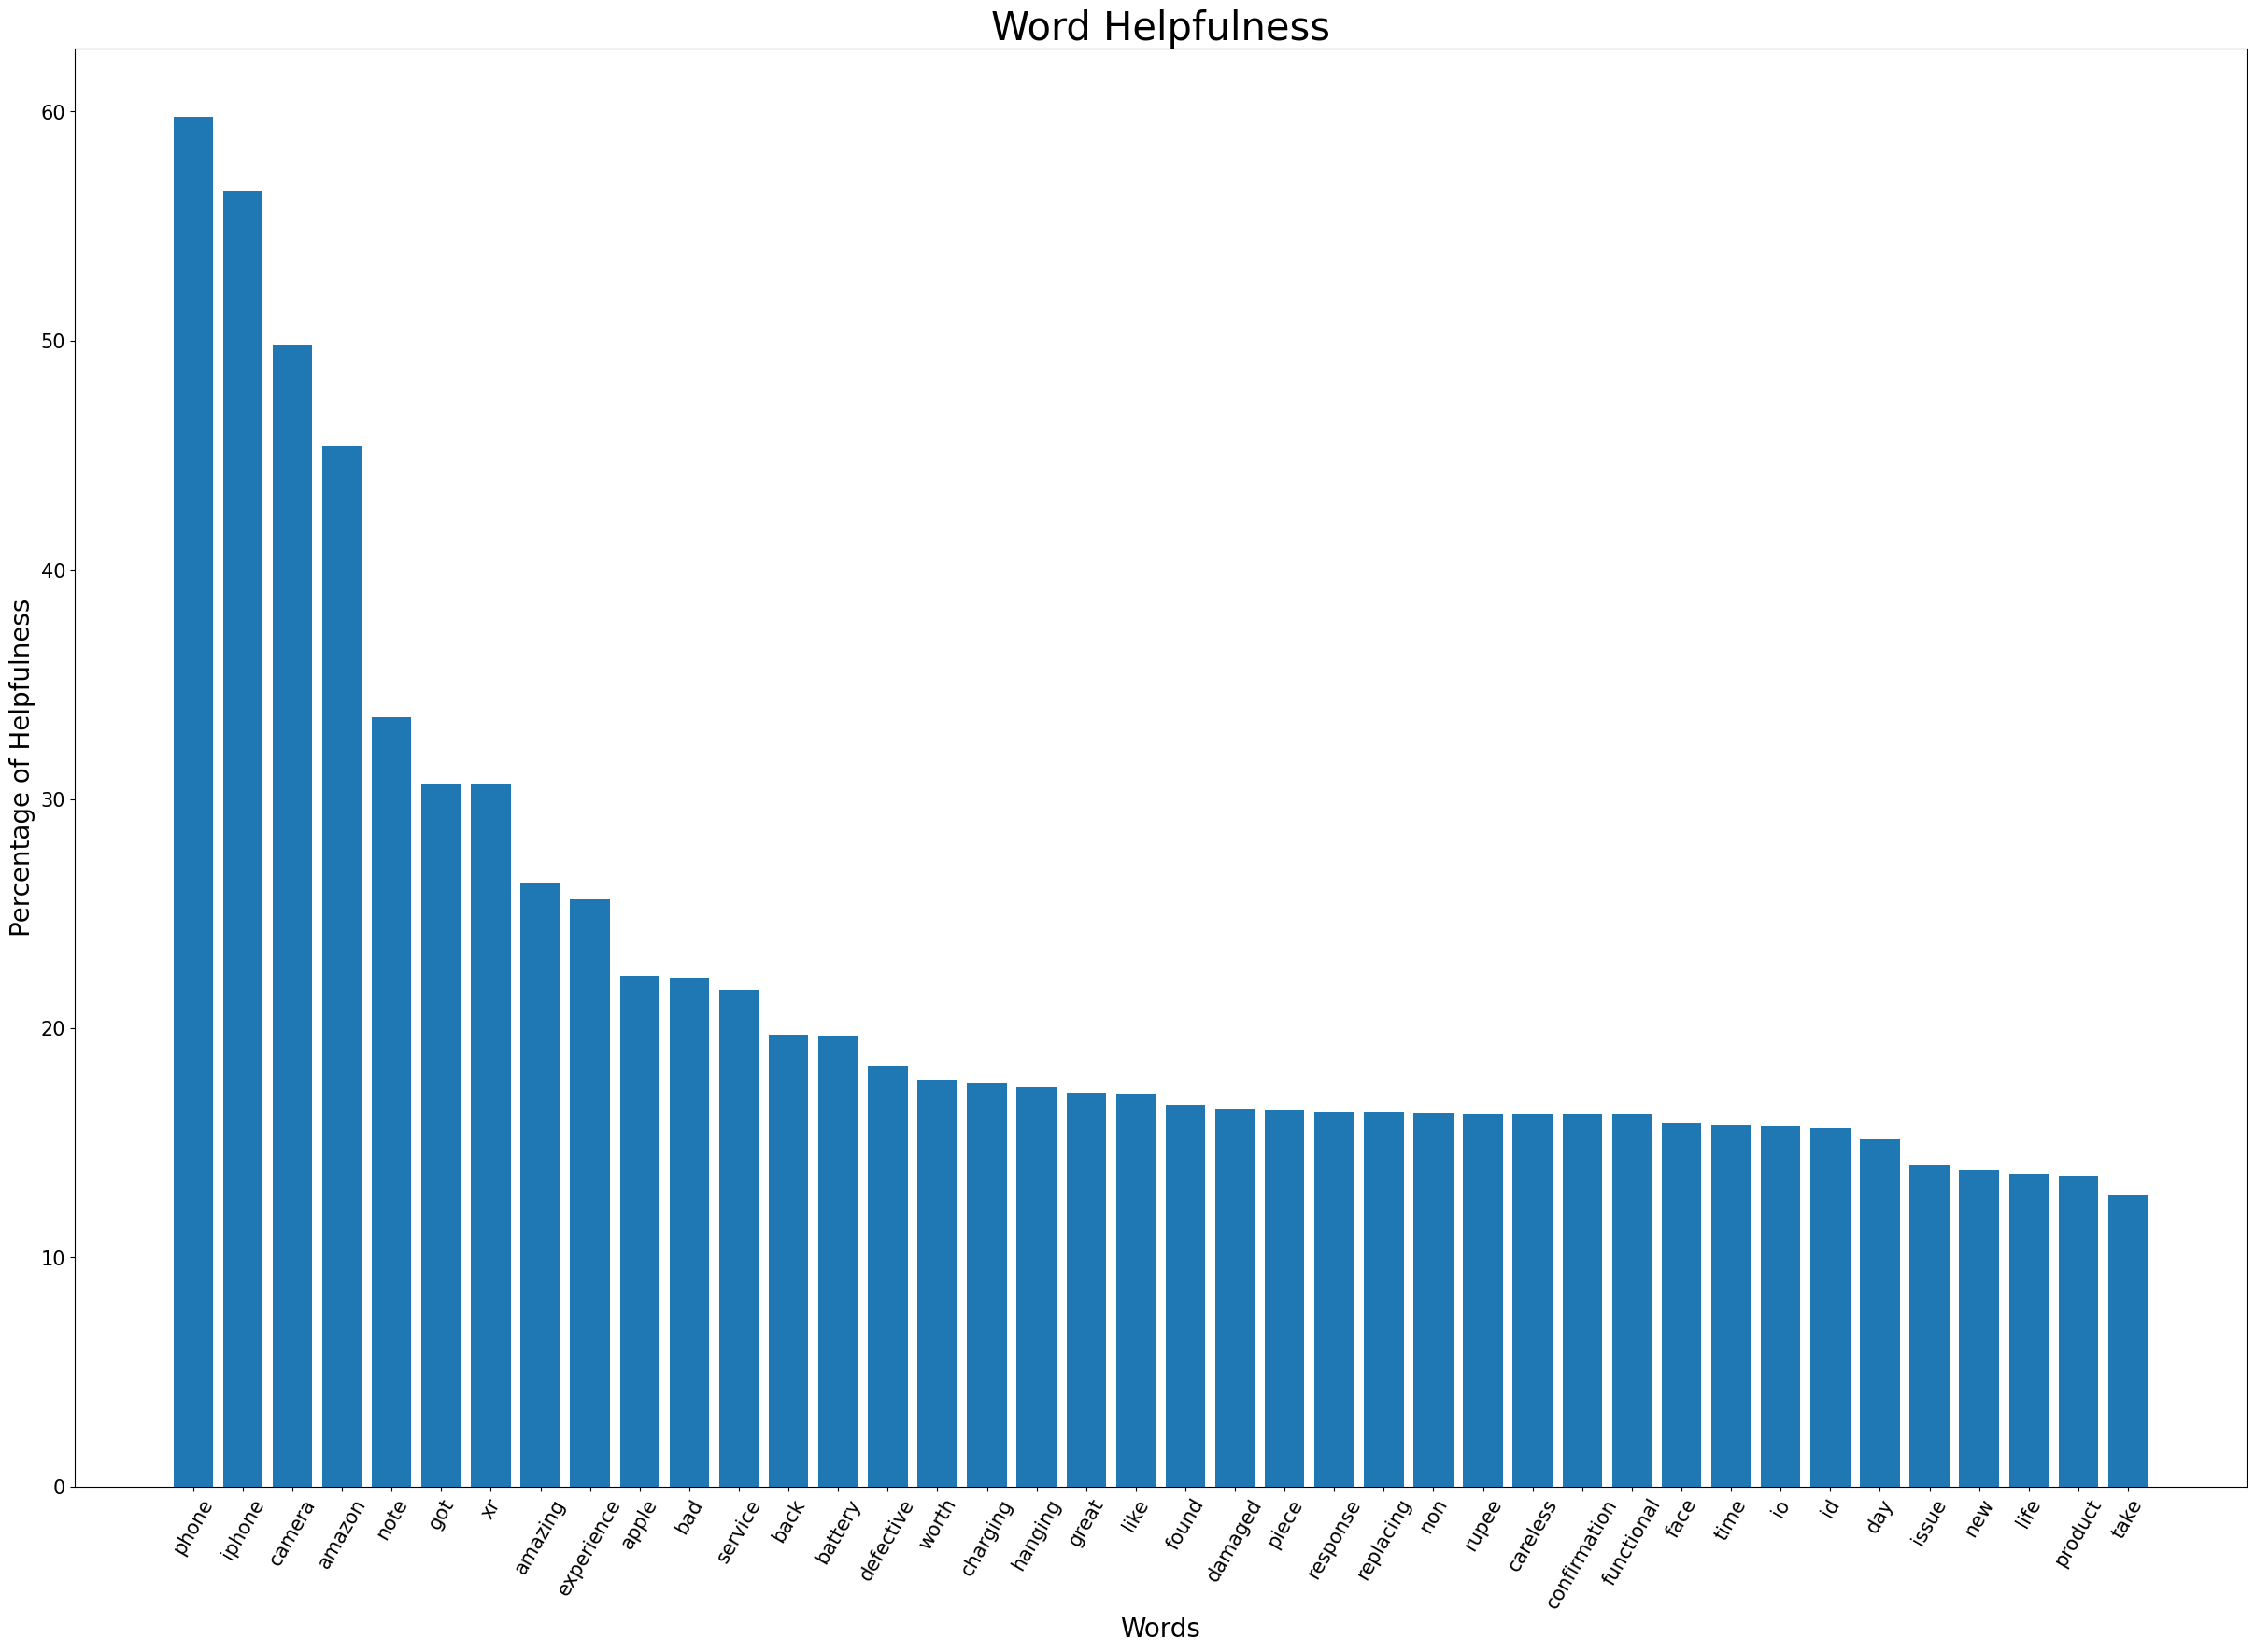

In [12]:
total_helpful_votes = dict([])
for i in range(mydf.shape[0]) :
    for word in set(mydf.lemmatized[i]) :
        total_helpful_votes[word] = total_helpful_votes.get(word, 0) + mydf.review_helpful_vote[i]

word_impact = pd.Series(total_helpful_votes) / mydf.review_helpful_vote.sum() * 100

word_impact = word_impact.sort_values(ascending = False)
# word_impact = word_impact[word_impact > 1]
plt.figure(figsize=(30,20))
plt.bar(word_impact.index[:40],word_impact.values[:40])
plt.xticks(rotation=60,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Words',fontsize=20)
plt.ylabel('Percentage of Helpfulness', fontsize=20)
plt.title('Word Helpfulness',fontsize = 30)
# plt.savefig('impact.png')